In [2]:
#Import pandas_datareader
import pandas_datareader as pdr

#Get the data for NASDAQ composite
data = pdr.get_data_yahoo('^IXIC', '2010-1-1', '2020-3-10')

#Print Last 2 rows of the data
data.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-09,8243.309570,7943.160156,7957.930176,7950.680176,4530350000,7950.680176
2020-03-10,8347.400391,7930.430176,8219.759766,8344.250000,4431930000,8344.250000


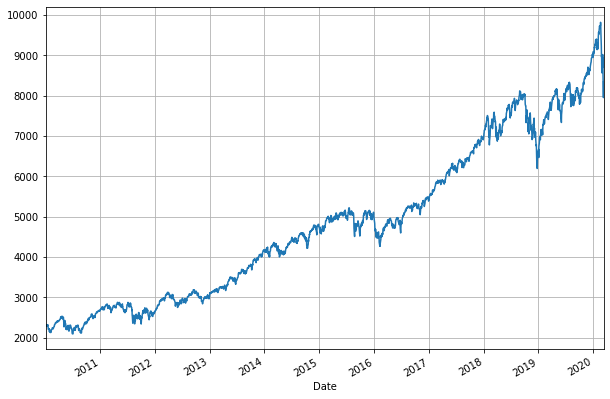

In [3]:
#Plot the Close Price 

#Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Call the plot method
data['Adj Close'].plot(figsize=(10,7), grid=True)
plt.show()

In [4]:
#Compute the percentage change

#Previous day close to today's open
data['overnight_returns'] = (
    data['Open']-data['Close'].shift(1))/data['Close'].shift(1)

#Open to Close
data['intraday_returns'] = (data['Close']-data['Open']) / data['Open']

data.head(3)

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns
Date,,,,,,,,
2010-01-04,2311.149902,2294.409912,2294.409912,2308.419922,1931380000,2308.419922,NaN,0.006106
2010-01-05,2313.729980,2295.620117,2307.270020,2308.709961,2367860000,2308.709961,-0.000498,0.000624
2010-01-06,2314.070068,2295.679932,2307.709961,2301.090088,2253340000,2301.090088,-0.000433,-0.002869


In [5]:
import numpy as np
#Definining conditions on which I want to trade
condition_1 = data.overnight_returns < -0.01
condition_2 = data.overnight_returns > -0.02

#Store it in the signal columns of dataframe data
data['signal'] = np.where(condition_1 & condition_2, 1, 0)

data.head()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,signal
Date,,,,,,,,,
2010-01-04,2311.149902,2294.409912,2294.409912,2308.419922,1931380000,2308.419922,NaN,0.006106,0
2010-01-05,2313.729980,2295.620117,2307.270020,2308.709961,2367860000,2308.709961,-0.000498,0.000624,0
2010-01-06,2314.070068,2295.679932,2307.709961,2301.090088,2253340000,2301.090088,-0.000433,-0.002869,0
2010-01-07,2301.300049,2285.219971,2298.090088,2300.050049,2270050000,2300.050049,-0.001304,0.000853,0
2010-01-08,2317.600098,2290.610107,2292.239990,2317.169922,2145390000,2317.169922,-0.003396,0.010876,0


In [6]:
data.loc[data.signal==1].head()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,signal
Date,,,,,,,,,
2010-02-25,2236.209961,2198.729980,2208.620117,2234.219971,2300530000,2234.219971,-0.012201,0.011591,1
2010-05-04,2465.550049,2411.280029,2465.550049,2424.250000,3052590000,2424.250000,-0.013283,-0.016751,1
2010-05-05,2421.050049,2382.070068,2395.209961,2402.290039,3041480000,2402.290039,-0.011979,0.002956,1
2010-05-11,2405.260010,2345.500000,2347.699951,2375.310059,2548840000,2375.310059,-0.011357,0.011760,1
2010-05-21,2243.000000,2165.790039,2169.580078,2229.040039,3389670000,2229.040039,-0.015621,0.027406,1


In [7]:
data.loc[data.signal==1].describe()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,signal
count,102.000000,102.000000,102.000000,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.0
mean,4360.986850,4281.824396,4312.332453,4328.572431,2.219369e+09,4328.572431,-0.013344,0.003026,1.0
std,2000.756777,1963.457895,1974.990523,1989.058354,4.401579e+08,1989.058354,0.002742,0.013158,0.0
min,2144.199951,2113.709961,2131.000000,2123.760010,1.371140e+09,2123.760010,-0.019965,-0.034734,1.0
25%,2633.952576,2571.199951,2622.640076,2612.402527,1.905138e+09,2612.402527,-0.015150,-0.004668,1.0
50%,3705.459961,3667.849976,3681.480103,3688.800049,2.175970e+09,3688.800049,-0.012134,0.003091,1.0
75%,5923.797485,5867.332520,5881.794800,5917.067505,2.430578e+09,5917.067505,-0.011174,0.010125,1.0
max,9065.759766,8976.429688,8976.429688,9020.769531,3.389670e+09,9020.769531,-0.010053,0.040705,1.0


In [8]:
#Computing the strategy returns
strategy_returns = data.signal * data.intraday_returns
strategy_returns

Date
2010-01-04    0.0
2010-01-05    0.0
2010-01-06   -0.0
2010-01-07    0.0
2010-01-08    0.0
             ... 
2020-03-04    0.0
2020-03-05   -0.0
2020-03-06    0.0
2020-03-09   -0.0
2020-03-10    0.0
Length: 2563, dtype: float64

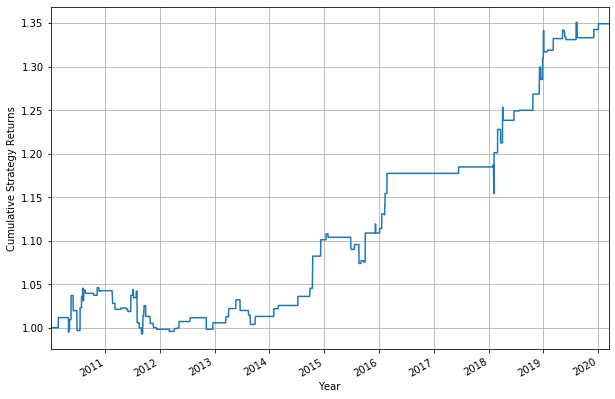

In [9]:
(strategy_returns+1).cumprod().plot(figsize=(10,7), grid=True)
plt.xlabel('Year')
plt.ylabel('Cumulative Strategy Returns')
plt.show()

Start date,2010-01-04
End date,2020-03-10
Total months,122
,Backtest
Annual return,3.0%
Cumulative returns,34.9%
Annual volatility,4.3%
Sharpe ratio,0.71
Calmar ratio,0.59
Stability,0.86
Max drawdown,-5.1%


/Users/anthony/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,5.07,2010-11-22,2011-09-02,2014-10-15,1018
1,3.87,2010-06-03,2010-06-29,2010-08-06,47
2,3.07,2015-01-26,2015-08-21,2015-10-02,180
3,2.77,2018-02-02,2018-02-05,2018-02-06,3
4,1.84,2019-01-02,2019-01-03,2019-05-09,92


Stress Events,mean,min,max
US downgrade/European Debt Crisis,-0.06%,-0.68%,-0.00%
Fukushima,0.00%,0.00%,0.00%
EZB IR Event,0.00%,-0.00%,-0.00%
Flash Crash,0.07%,0.00%,0.30%
Apr14,0.00%,0.00%,0.00%
Oct14,0.15%,-0.00%,2.04%
Fall2015,-0.06%,-1.98%,0.29%
Recovery,0.00%,-3.47%,2.74%
New Normal,0.02%,-2.77%,4.07%


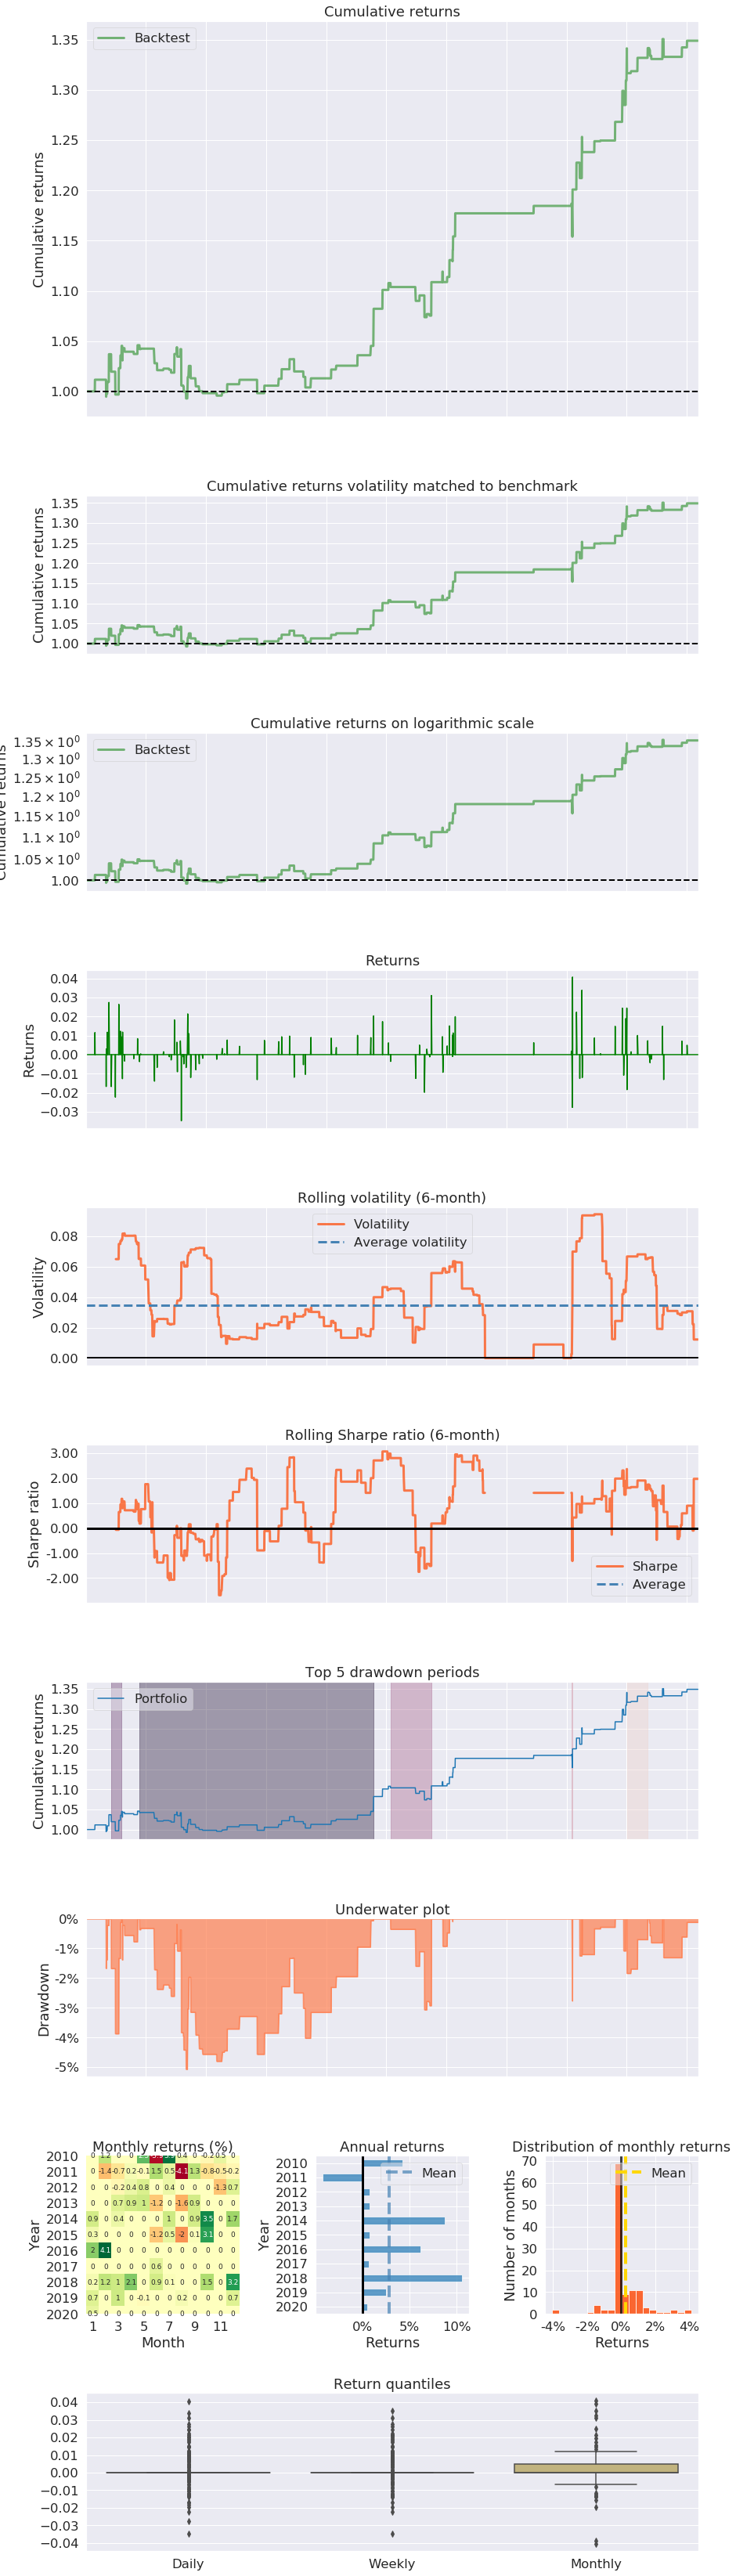

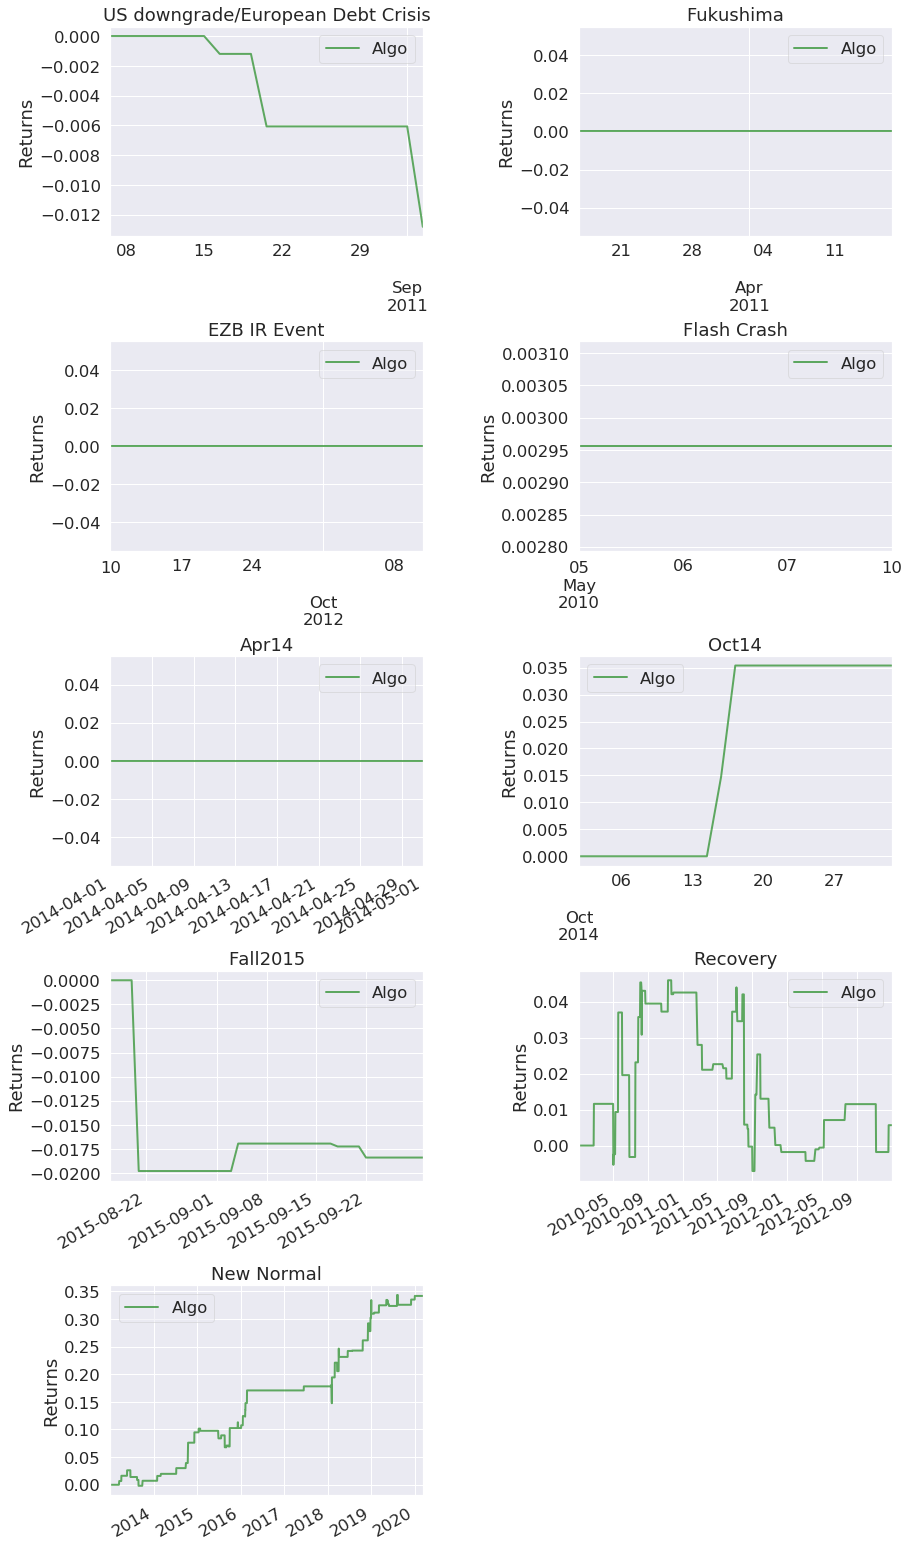

In [11]:
#Detailed performance analysis
import pyfolio as pf
pf.create_full_tear_sheet(strategy_returns)